## Pre-Processing

### Installing Requirements

In [7]:
!pip install -r requirements.txt

  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=09e04009dd26b4f80ab1821984a352ae59f1f0ce0f9c98819649fcad40a3a48e
  Stored in directory: c:\users\vinicius\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


### Download image files and dataset example

In [5]:
!gdown --id 1UblD-JlfEkDUeScjd6B8gBDvQBEZVgRQ -O datasets.zip
!gdown --id 19IyqeSFspBqgprGZ1x3DGRvqCUWJarCx -O images.zip

c:\Users\Vinicius\.conda\envs\remover\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1UblD-JlfEkDUeScjd6B8gBDvQBEZVgRQ
From (redirected): https://drive.google.com/uc?id=1UblD-JlfEkDUeScjd6B8gBDvQBEZVgRQ&confirm=t&uuid=3b7311bd-7fbd-4bfd-a2bb-a468f3ee942a
To: c:\Users\Vinicius\Desktop\Nova pasta (2)\YOLO-Traffic-Detection\datasets.zip

  0%|          | 0.00/40.2M [00:00<?, ?B/s]
  1%|▏         | 524k/40.2M [00:00<00:10, 3.72MB/s]
  7%|▋         | 2.62M/40.2M [00:00<00:03, 12.0MB/s]
 18%|█▊        | 7.34M/40.2M [00:00<00:01, 25.7MB/s]
 37%|███▋      | 14.7M/40.2M [00:00<00:00, 42.8MB/s]
 48%|████▊     | 19.4M/40.2M [00:00<00:00, 37.4MB/s]
 68%|██████▊   | 27.3M/40.2M [00:00<00:00, 49.1MB/s]
 89%|████████▉ | 35.7M/40.2M [00:00<00:00, 58.8MB/s]
100%|██████████| 40.2M/40.2M [00:0

In [7]:
!unzip datasets.zip
!unzip images.zip

Archive:  datasets.zip
   creating: datasets/
   creating: datasets/cars-detection/
  inflating: datasets/cars-detection/data.yaml  
   creating: datasets/cars-detection/test/
   creating: datasets/cars-detection/test/images/
  inflating: datasets/cars-detection/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
  inflating: datasets/cars-detection/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
  inflating: datasets/cars-detection/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
  inflating: datasets/cars-detection/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
  inflating: datasets/cars-detection/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
  inflating: datasets/cars-detection/test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
  inflating: datasets/cars-detection/test/images/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg  
  inflating: datasets/cars

## Fine-Tuning YOLO using custom dataset of vehicles

In [1]:
import os
import yaml

# Example-dataset used in fine-tuning
# You can set your own dataset and fine-tune YOLO
dataset_path = "datasets/finetuning-vehicles"
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- car
- threewheel
- bus
- truck
- motorbike
- van
nc: 6
train: C:/Users/Vinicius/Desktop/Projeto YOLO/datasets/finetuning-vehicles/train/images
val: C:/Users/Vinicius/Desktop/Projeto YOLO/datasets/finetuning-vehicles/valid/images



### Visualize dataset images

In [2]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

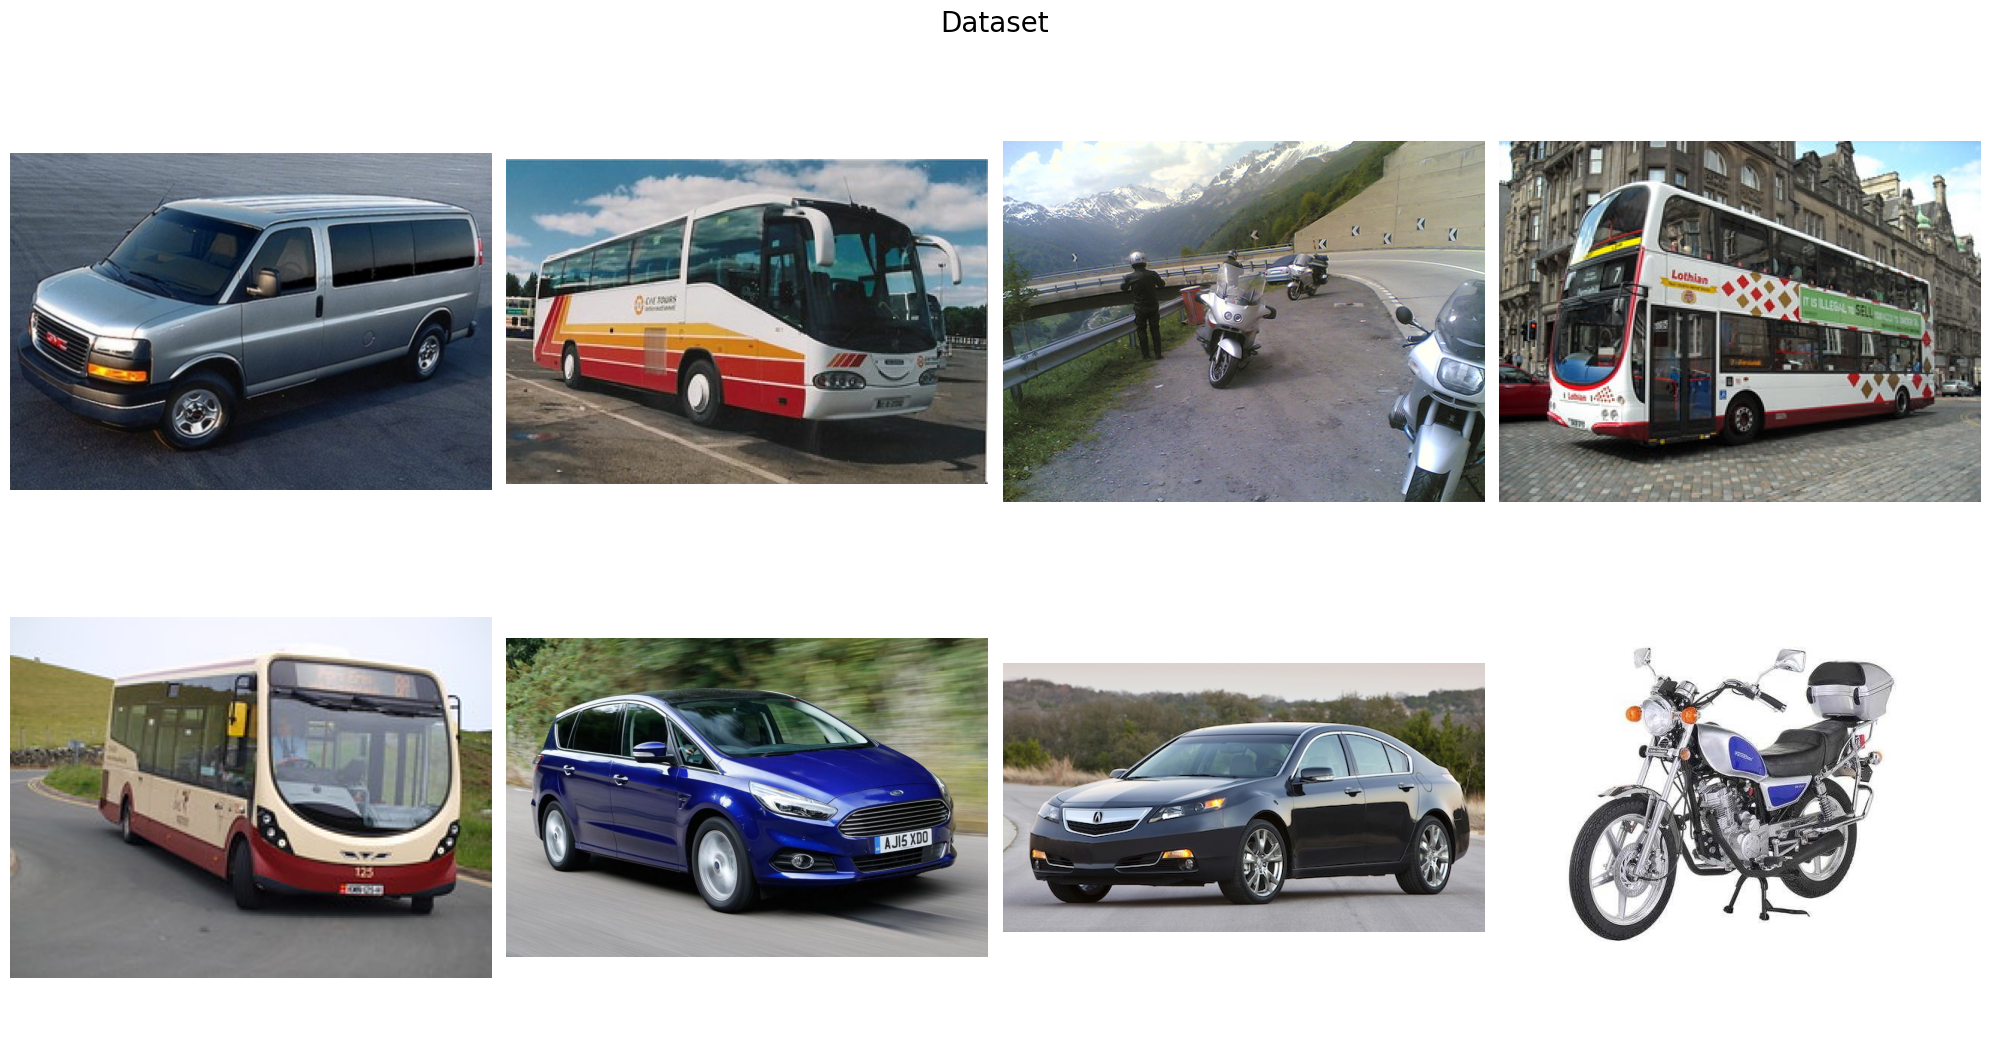

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import os

image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 8)]

# 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 11))

for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')  

plt.suptitle('Dataset', fontsize=20)
plt.tight_layout()
plt.show()

### Fine-tuning Run

In [ ]:
import os
import torch
from ultralytics import YOLO

# Load YOLO Model
# You can choose any yolo model of preference
# To see all options available go search YOLO ultralytics
model = YOLO("yolo11n.pt")  

# Start the training
results = model.train(
    # Note that you shall change the complete paths in .yaml file
    # to run in your pc
    data=yaml_file_path,   # Path to the .yaml file with dataset configurations (path to the dataset configuration file)
    epochs=2,            # Number of epochs (how many times the model will iterate over the dataset during training)
    imgsz=640,             # Input image size (all images will be resized to 640x640)
    device=0,              # '0' to use the first GPU, or 'cpu' to use the CPU (specifies the device where the training will run, '0' is the first GPU, 'cpu' uses the CPU)
    patience=50,           # Number of epochs without improvement before stopping the training (training will stop if no improvement is seen for 50 consecutive epochs)
    batch=32,              # Batch size (number of images processed at once before updating the model weights)
    optimizer='auto',      # Automatic optimizer (the model will choose the best optimizer based on the settings)
    lr0=0.0001,            # Initial learning rate (starting value of the learning rate)
    lrf=0.1,               # Final learning rate (final value of the learning rate to be reached at the end of training)
    dropout=0.1,           # Dropout applied during training (probability of dropping units during training to prevent overfitting)
    seed=0                 # Seed for reproducibility (sets the seed for random number generation to ensure the training is reproducible)
)


## Defining points used to delimit the Area of Highway Road

In [ ]:
import cv2
import numpy as np

# List to store all points captured by user clicks
points = []
# Variable to store the highway image used to define the limits of data capturing
image = None  

# Function to calculate the y-coordinate based on the line equation: y = m * x + b
def calculate_y(x, ang_factor, intercept):
    return int(ang_factor * x + intercept)

# Function to calculate the end points of a line given a point and slope (angle)
def get_points(image, point1, ang_factor):
    height, width, _ = image.shape

    # Calculate the intercept of the line using the point's coordinates
    intercept = point1[1] - ang_factor * point1[0]

    # Calculate the y-coordinates of the line at x = 0 (left) and x = width-1 (right)
    y_start = calculate_y(0, ang_factor, intercept)  
    y_end = calculate_y(width-1, ang_factor, intercept)  
    p1 = (0, y_start)  # Left point of the line
    p2 = (width-1, y_end)  # Right point of the line

    return p1, p2

# Mouse callback function to handle the user's point selection
def mouse_callback(event, x, y, flags, param):
    global points, image
    if event == cv2.EVENT_LBUTTONDOWN:
        # Add the clicked point to the list of points
        points.append((x, y))    
        aux_img = image.copy()  # Create a copy of the original image for drawing
        
        # If 2 points are selected, draw a red line connecting them
        if len(points) == 2:  
            cv2.line(aux_img, points[0], points[1], (0, 0, 255), 2)  # Red color for the line
            cv2.imwrite("images/results/close_line.png", aux_img)  # Save the result image
            cv2.imshow("Select two points", aux_img)
        
        # If 3 points are selected, calculate the line with angle and draw it in blue
        elif len(points) == 3:
            ang_factor = (points[1][1] - points[0][1]) / (points[1][0] - points[0][0])  # Calculate the slope of the line
            p1, p2 = get_points(aux_img, points[2], ang_factor)  # Get the end points of the line
            cv2.line(aux_img, p1, p2, (255, 0, 0), 2)  # Blue color for the line
            cv2.imwrite("images/results/far_line.png", aux_img)  # Save the result image
            cv2.imshow("Select two points", aux_img)
        
        # If 5 points are selected, draw a polygon representing the highway area in red
        elif len(points) == 5:
            poly_points = np.array([points[0], points[1], points[3], points[4]], np.int32)
            poly_points = poly_points.reshape((-1, 1, 2))  # Reshape to match OpenCV's requirements
            cv2.polylines(aux_img, [poly_points], isClosed=True, color=(0, 0, 255), thickness=2)  # Red polygon
            cv2.imwrite("images/results/polygon_highway.png", aux_img)
            cv2.imshow("Select two points", aux_img)
        
        # If 6 points are selected, calculate and draw the middle line in green
        elif len(points) == 6:
            ang_factor = (points[1][1] - points[0][1]) / (points[1][0] - points[0][0])  # Calculate the slope of the line
            p1, p2 = get_points(aux_img, points[5], ang_factor)  # Get the end points of the middle line
            cv2.line(aux_img, p1, p2, (0, 255, 0), 2)  # Green color for the line
            cv2.imwrite("images/results/mid_line.png", aux_img)  # Save the result image
            cv2.imshow("Select two points", aux_img)
        
        # If 8 points are selected, draw a polygon representing the detection area in purple
        elif len(points) == 8:
            poly_points = np.array([points[0], points[1], points[6], points[7]], np.int32)
            poly_points = poly_points.reshape((-1, 1, 2))  # Reshape to match OpenCV's requirements
            cv2.polylines(aux_img, [poly_points], isClosed=True, color=(255, 153, 255), thickness=2)  # Purple polygon
            cv2.imwrite("images/results/polygon_detect_area.png", aux_img)  # Save the result image
            cv2.imshow("Select two points", aux_img)
            cv2.setMouseCallback("Select two points", lambda *args: None)  # Disable further mouse callback

# Path to the image used for highway detection
# If another highway video is used, change the image used here
image_path = "images/highway.png"  

# Load the image from the specified path
image = cv2.imread(image_path)
if image is None:
    print("Error loading image.")
else:
    cv2.imshow("Select two points", image)  # Display the image
    cv2.setMouseCallback("Select two points", mouse_callback)  # Set the mouse callback function

    # Wait until a key is pressed and then close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [6]:
print(points)

[(1717, 677), (201, 680), (978, 376), (865, 376), (1091, 377), (1381, 527), (533, 528), (1404, 523)]


### Example gif of executing the code

![define-points.gif](images/define-points2.gif)

### Images of each Area setted by selecting points in Highway Image

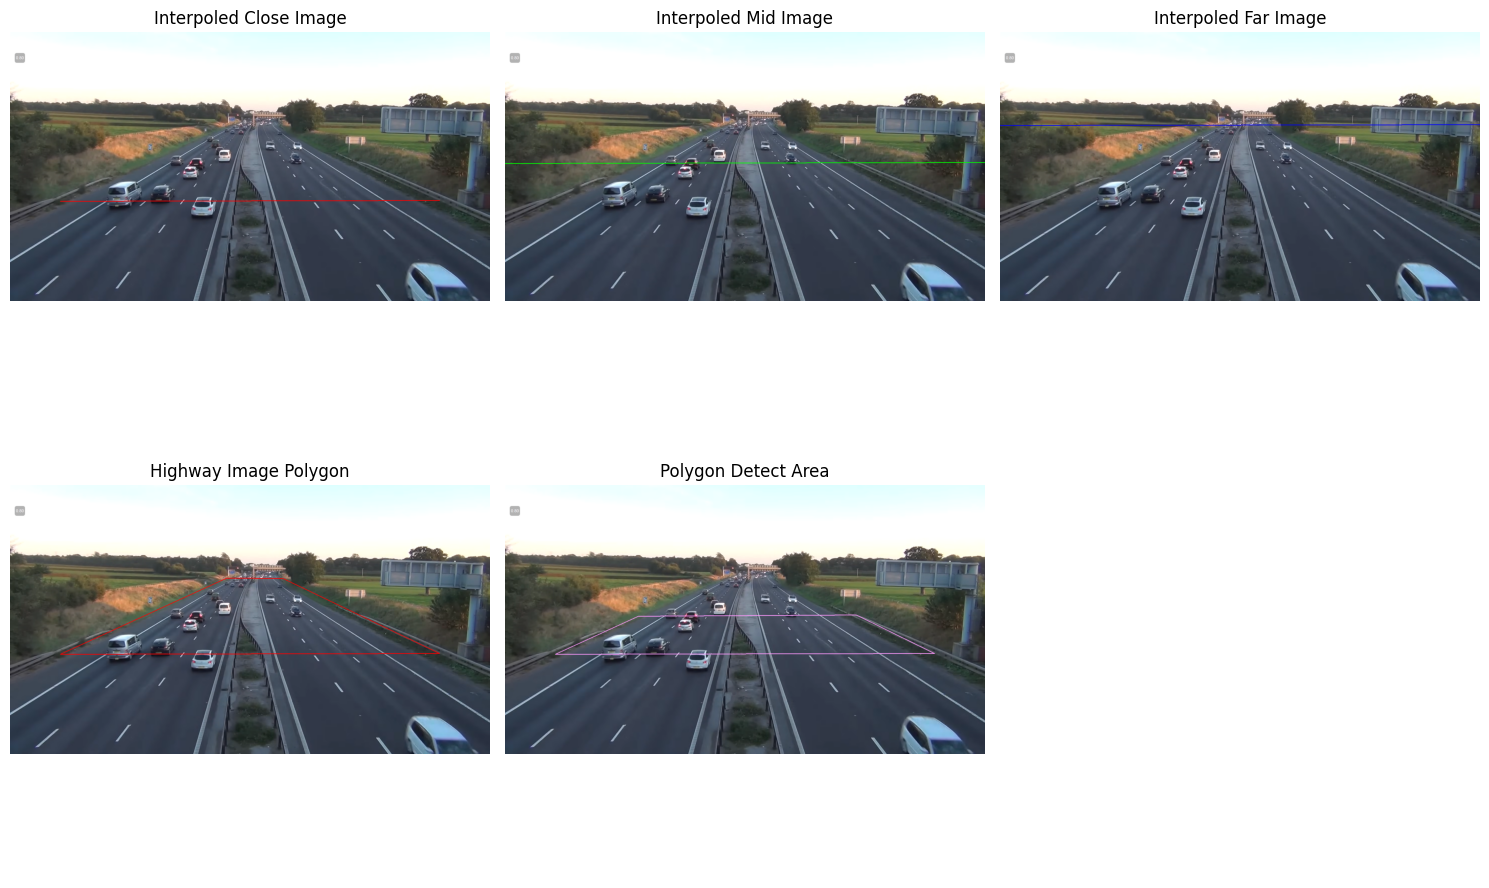

In [7]:
import cv2
import matplotlib.pyplot as plt

#Images paths
near_img_path = "images/results/close_line.png"
far_img_path = "images/results/far_line.png"
mid_img_path = "images/results/mid_line.png"
polygon_highway_path = "images/results/polygon_highway.png"
polygon_img_path = "images/results/polygon_detect_area.png"

highway_points12_path = "images/dist12.png"
highway_points23_path = "images/dist23.png"

# Verification function load
def load_and_check_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Erro: não foi possível carregar a imagem em {image_path}")
    return img

# Loading images
near_img = load_and_check_image(near_img_path)
far_img = load_and_check_image(far_img_path)
mid_img = load_and_check_image(mid_img_path)
polygon_highway_img = load_and_check_image(polygon_highway_path)
polygon_img = load_and_check_image(polygon_img_path)
dist12_img = load_and_check_image(highway_points12_path)
dist23_img = load_and_check_image(highway_points23_path)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(cv2.cvtColor(near_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Interpoled Close Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(mid_img, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Interpoled Mid Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(far_img, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Interpoled Far Image')
axes[0, 2].axis('off')

axes[1, 0].imshow(cv2.cvtColor(polygon_highway_img, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Highway Image Polygon')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(polygon_img, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Polygon Detect Area')
axes[1, 1].axis('off')

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

### Highway Upper Images from Google Maps

Google Maps was used to estimate the real distance of points, that way we can map the video pixesl to its real position

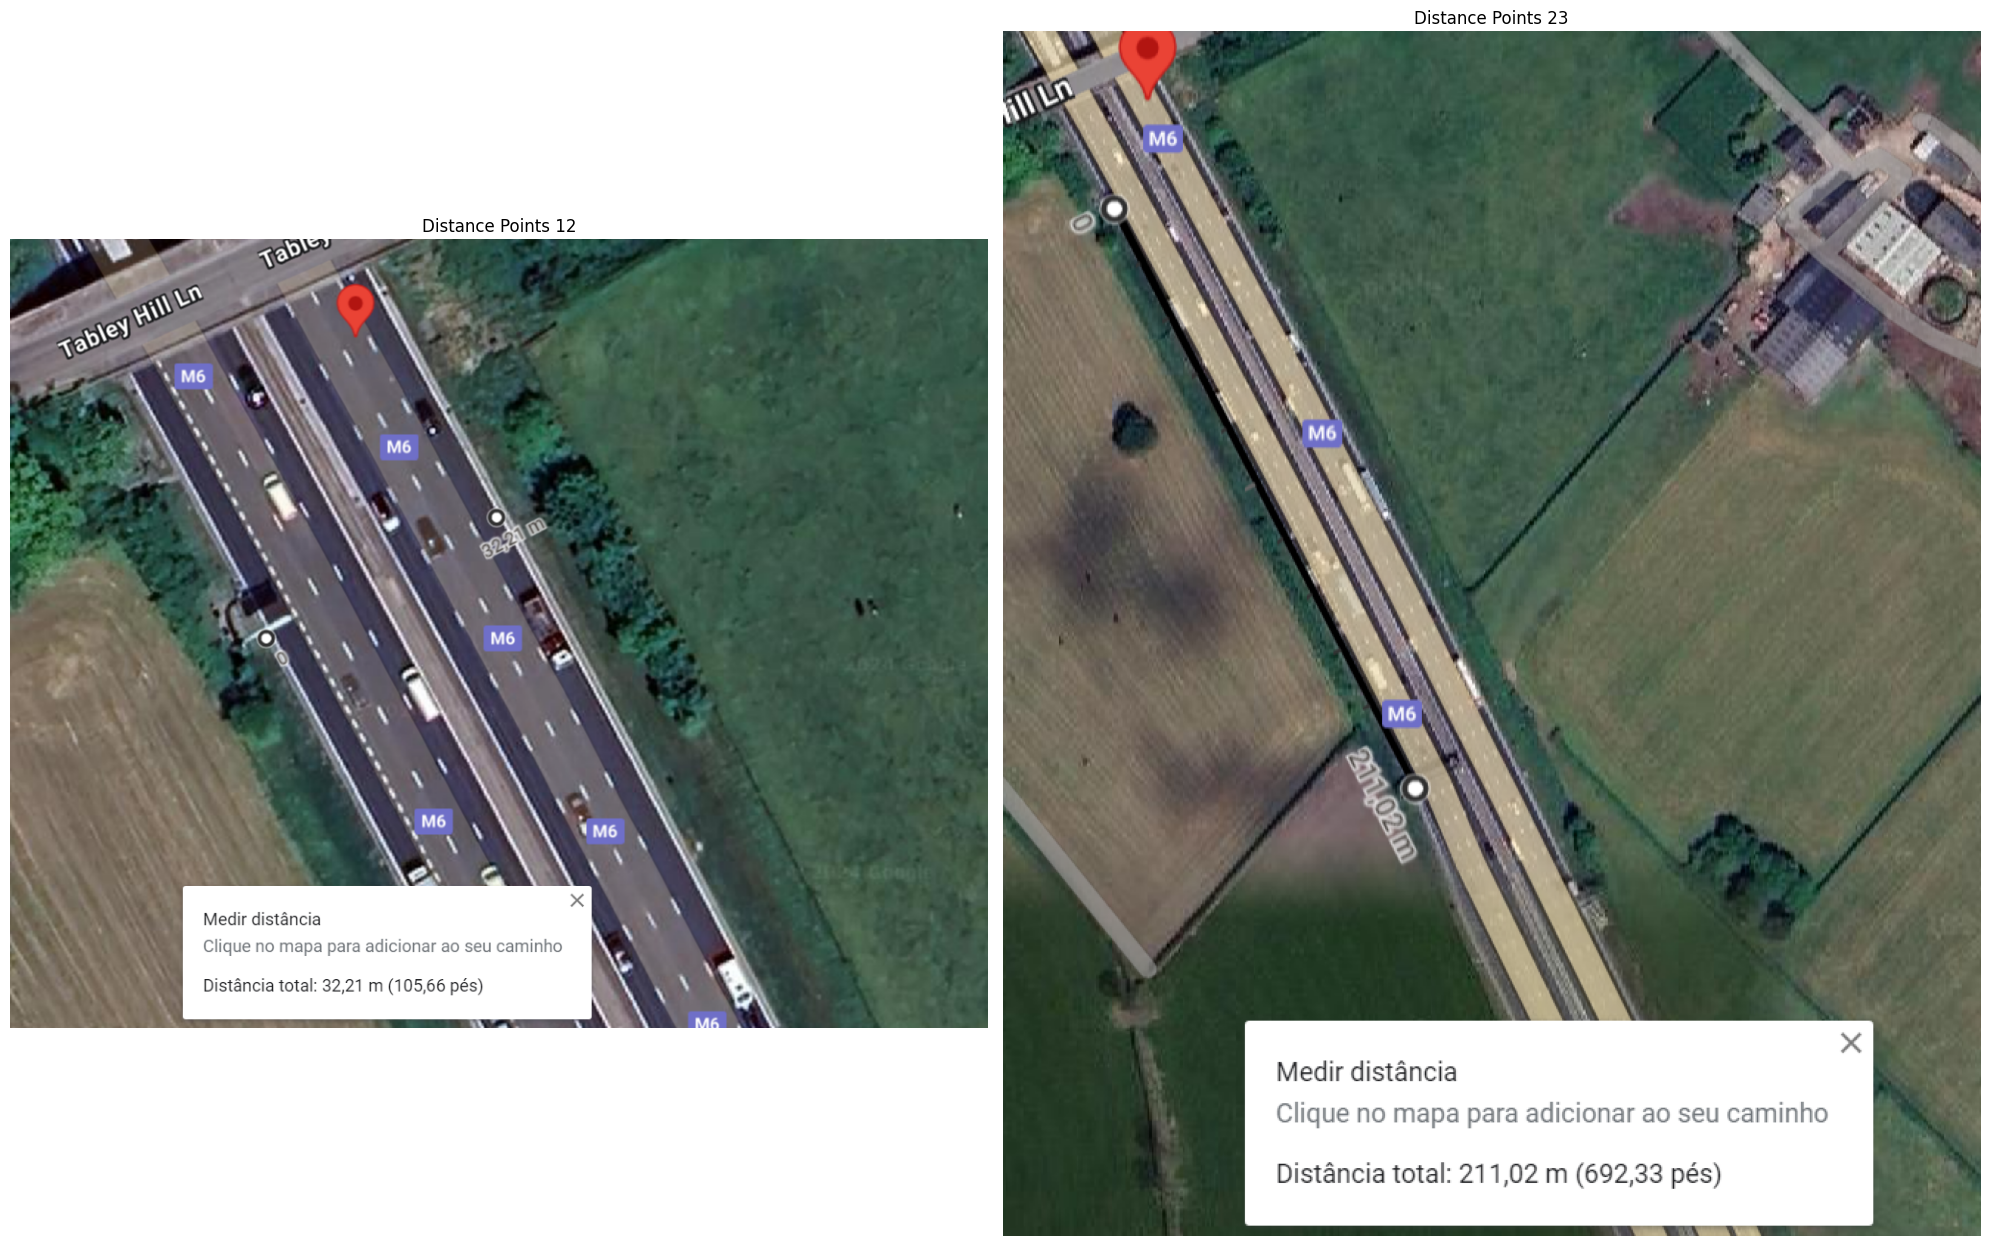

In [57]:
# Distances width and length of the highway
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(cv2.cvtColor(dist12_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Distance Points 12')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(dist23_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Distance Points 23')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Yolo Implementation
Its possible to run all cells inside **YOLO Implementation** without having executed the earlier cells
if the main idea is to see YOLO working with pre-defined settings 

### Auxiliar Functions 

In [1]:
# Auxiliar functions for thickness and text scale
def calculate_dynamic_text_scale(resolution_wh: tuple[int, int]) -> float:
    return min(resolution_wh) * 1e-3 * 0.8

def calculate_dynamic_line_thickness(resolution_wh: tuple[int, int]) -> int:
        min_dimension = min(resolution_wh)
        if min_dimension < 480:
            return 2
        if min_dimension < 720:
            return 2
        if min_dimension < 1080:
            return 2
        if min_dimension < 2160:
            return 4
        else:
            return 4

In [2]:
import numpy as np

# Comment this line if you prefer to use the selected points, set earlier
points = [(1723, 681), (239, 654), (973, 381), (857, 378), (1090, 383), (1383, 522), (582, 509), (1377, 523)]

# Area which the camera detects the car (small rectangle)
POINTS = np.array([points[0], points[1], points[6], points[7]])

# Area which defines the highway and its points (larger rectangle)
SOURCE = np.array([points[0], points[1], points[3], points[4]])

# Highway dimensions in meters
highway_width = 32
highway_height = 211

# Target area with the highway's real-world dimensions
TARGET = np.array([
    (highway_width, highway_height),
    (0, highway_height),
    (0, 0),
    (highway_width, 0)
])

# This function takes pixel points from the image and transforms them into real-world coordinates
def transform_points(points):
    # Convert the source and target arrays to float32 type for transformation
    source = SOURCE.astype(np.float32)
    target = TARGET.astype(np.float32)

    # Get the perspective transformation matrix based on source and target points
    matrix = cv2.getPerspectiveTransform(source, target)
    
    # Apply the perspective transformation to the given points
    reshaped_points = points.reshape(-1, 1, 2).astype(np.float32)
    new_points = cv2.perspectiveTransform(reshaped_points, matrix)
    
    # If the transformation returns None, return None
    if new_points is None:
        return None
    
    # Convert the transformed points back to float32 type
    new_points = new_points.astype(np.float32)
    
    # Return the transformed points reshaped to 2D array
    return new_points.reshape(-1, 2)


In [3]:
import cv2

# Function to display the count of vehicles in each direction on the frame
def put_counting_vehicles(frame, count_positive, count_negative):
    # Display the count of vehicles moving south (positive direction) in green text
    cv2.putText(frame, f"Vehicles heading south: {count_positive}", (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)  # Text settings: font, size, color, thickness
    
    # Display the count of vehicles moving north (negative direction) in red text
    cv2.putText(frame, f"Vehicles heading north: {count_negative}", (10, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)  # Text settings: font, size, color, thickness
    
    # Return the frame with the added text
    return frame

# Function to display the total frames processed and the elapsed time on the frame
def put_frames_screen(frame, total_frames, time, video_fps):
    # Display the total number of frames processed so far in green text
    cv2.putText(frame, f"Elapsed Frames: {total_frames}", (10, 150),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)  # Text settings: font, size, color, thickness
    
    # Display the elapsed time (in seconds) in green text
    cv2.putText(frame, f"Elapsed Time: {time:.2f}", (10, 200),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)  # Text settings: font, size, color, thickness
    
    # Return the frame with the added text
    return frame


### <strong>Video used to implement traffic detection with YOLO</strong>

**Road traffic video for object recognition:** This is a highway traffic video from the UK, which is used to implement object recognition using YOLO.

---

[![Click here to watch the video](https://img.youtube.com/vi/wqctLW0Hb_0/0.jpg)](https://www.youtube.com/watch?v=wqctLW0Hb_0&list=PLcQZGj9lFR7y5WikozDSrdk6UCtAnM9mB&index=3)

---



In [6]:
import cv2
import supervision as sv
from ultralytics import YOLO
import time
import numpy as np
from collections import defaultdict, deque
import math

# Change here to use the fine-tuned YOLO model
model = YOLO("yolo11n.pt")  # Load the pre-trained YOLO model
vehicle_ids = set()  # Set to keep track of unique vehicle ids

# Path to video used for testing the model
video_path = "video4.mp4"
video_info = sv.VideoInfo.from_video_path(video_path)  # Get video information (fps, resolution)

byte_track = sv.ByteTrack(frame_rate=video_info.fps)  # Initialize ByteTrack for object tracking
cap = cv2.VideoCapture(video_path)  # Open video file for reading
polygon_zone = sv.PolygonZone(POINTS)  # Define the polygon zone where detections are valid

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames in the video
total_time = total_frames / video_info.fps  # Total duration of the video in seconds

# Get dynamic thickness and text scale based on video resolution for better visualization
thickness = calculate_dynamic_line_thickness(resolution_wh=video_info.resolution_wh)
text_scale = calculate_dynamic_text_scale(resolution_wh=video_info.resolution_wh)

# Initialize annotators for bounding boxes, labels, and trace visualization
bounding_box_anotator = sv.BoundingBoxAnnotator(thickness=thickness, color_lookup=sv.ColorLookup.TRACK)
label_anotator = sv.LabelAnnotator(text_scale=text_scale, text_thickness=thickness, color_lookup=sv.ColorLookup.TRACK)
trace_anotator = sv.TraceAnnotator(thickness=thickness, trace_length=video_info.fps * 2, color_lookup=sv.ColorLookup.TRACK)

# Coordinates for tracking vehicle positions
coords = defaultdict(lambda: deque(maxlen=video_info.fps))

# Store vehicle data like speed, frame information, and class name
vehicle_data = defaultdict(lambda: {"speed": [], "frame": [], 'class': [], 'direction': []})  

# Initialize vehicle counters for each side of the highway
count_positive = 0  # Vehicles moving in the positive direction
count_negative = 0  # Vehicles moving in the negative direction

# Options for toggling different visual elements on the video frames
options = {
    "highway_area": False,
    "detection_area": False,
    "counting": False,
    "trace": False,
    "label": False,
    "box": False,
    "speed": False,
    "frames": False,
}

track_time_ini = time.time()  # Initial timestamp for the video
while True:
    start_time = time.time()  # Start time of each frame processing
    
    frame_id = int(cap.get(cv2.CAP_PROP_POS_FRAMES))  # Get the current frame ID
    ret, frame = cap.read()  # Read a frame from the video
    if not ret:  # If reading the frame fails, exit the loop
        break
    
    # Applying YOLO to detect objects in the current frame
    result = model(frame, verbose=False)[0]
    
    # Convert YOLO results into a Detections object from Supervision library
    detections = sv.Detections.from_ultralytics(result)
    
    # Filter detections to only those within the defined polygon zone
    detections = detections[polygon_zone.trigger(detections)]
    
    # Update tracking with the new detections
    detections = byte_track.update_with_detections(detections=detections)
    
    # Get the coordinates of each detected object
    pts = detections.get_anchors_coordinates(anchor=sv.Position.BOTTOM_CENTER)
    pts = transform_points(pts)  # Transform points (for tracking)
    pts = pts if pts is not None and len(pts) > 0 else []  # Ensure valid points
    labels = []  # List to store the labels for each detection
    
    for tracker_id, [x, y], class_name in zip(detections.tracker_id, pts, detections.data.get('class_name', [])):
        coords[tracker_id].append((x, y))  # Append coordinates to the tracker
        
        # Calculate speed for the detected vehicles
        if len(coords[tracker_id]) >= 5:  # Ensure there are enough points to calculate speed
            frames = len(coords[tracker_id])
            start = coords[tracker_id][-1][1]  # Start position (y-coordinate)
            end = coords[tracker_id][0][1]  # End position (y-coordinate)
            
            # Calculate speed (can also use Euclidean distance instead of simple position change)
            speed = (end - start) / (frames / video_info.fps)
            
            # Check if the calculated speed is too small and reset to 0
            if abs(end - start) < 1:  
                speed = 0
            else:
                speed = (end - start) / (frames / video_info.fps)

            speed = int(speed * 3.6)  # Convert speed from m/s to km/h
            direction = 'positivo' if end > start else 'negativo'  # Determine movement direction
            timestamp = time.time()  # Get the timestamp for the current frame

            # Count vehicles moving in the positive or negative direction
            if direction == 'positivo' and tracker_id not in vehicle_ids:
                count_positive += 1
            elif direction == 'negativo' and tracker_id not in vehicle_ids:
                count_negative += 1
            vehicle_ids.add(tracker_id)  # Add the vehicle to the set of tracked vehicles

            # Store vehicle data (speed, frame, and class)
            vehicle_data[tracker_id]['speed'].append(speed)
            vehicle_data[tracker_id]['frame'].append(frame_id)
            vehicle_data[tracker_id]['class'].append(class_name)
            vehicle_data[tracker_id]['direction'].append(direction)

            # Update labels to show speed if enabled
            if options['speed'] == False:
                labels.append(f"{class_name}")
            else:
                labels.append(f"#{class_name} {speed}km/h")
        else:
            labels.append(f"{class_name}")  # If not enough data, just show class name

    # Copy the frame to annotate it
    annotated_frame = frame.copy()
    
    # Annotate the frame with different options
    if options['label']:
        annotated_frame = label_anotator.annotate(scene=annotated_frame, detections=detections, labels=labels)
    if options['trace']:
        annotated_frame = trace_anotator.annotate(scene=annotated_frame, detections=detections)
    if options['counting']:
        annotated_frame = put_counting_vehicles(annotated_frame, count_positive, count_negative)
    if options['box']:
        annotated_frame = bounding_box_anotator.annotate(scene=annotated_frame, detections=detections)
    if options['detection_area']:
        annotated_frame = sv.draw_polygon(annotated_frame, polygon=POINTS, color=sv.Color.GREEN)
    if options['highway_area']:
        annotated_frame = sv.draw_polygon(annotated_frame, polygon=SOURCE, color=sv.Color.RED)
    if options['frames']:
        annotated_frame = put_frames_screen(annotated_frame, frame_id, frame_id / video_info.fps, video_info.fps)
    
    # Keyboard inputs for toggling options on the video
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  # Quit the video playback
        break
    elif key == ord('1'):
        options['highway_area'] = not options['highway_area']
    elif key == ord('2'):
        options['detection_area'] = not options['detection_area']
    elif key == ord('3'):
        options['box'] = not options['box']
    elif key == ord('4'):
        options['trace'] = not options['trace']
    elif key == ord('5'):
        options['label'] = not options['label']
    elif key == ord('6'):
        options['counting'] = not options['counting']
    elif key == ord('7'):
        options['speed'] = not options['speed']
    elif key == ord('8'):
        options['frames'] = not options['frames']
    elif key == ord('a'):  # Go backward by 50 frames
        frame_id = max(0, frame_id - 50)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        track_time_ini = (frame_id / video_info.fps)
    elif key == ord('d'):  # Go forward by 50 frames
        frame_id += 50
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        track_time_ini = (frame_id / video_info.fps)
 
    # Optionally display the annotated frame
    cv2.imshow("Detections with Labels", annotated_frame)
    
    # Make sure execution respects the frame rate of the video
    elapsed_time = time.time() - start_time
    remaining_time = 1 / video_info.fps - elapsed_time
    if remaining_time > 0:
        time.sleep(remaining_time)

    if total_frames % 500 == 0:
        print(total_frames)

cap.release()  # Release the video capture
cv2.destroyAllWindows()  # Close any OpenCV windows

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


## Temporal Analysis of Speeds and Vehicle Counts

Skip the code section below if you just wish to run the example of graphs

In [5]:
import json
import pandas as pd

# Converting vehicle_data to a pandas DataFrame and saving it as a CSV
rows = []  # List to store rows of data
# Iterate through each tracker_id and its associated data
for tracker_id, data in vehicle_data.items():
    # Iterate through the speed, frame, and vehicle_class for each tracker_id
    for speed, frame, vehicle_class, direction in zip(data["speed"], data["frame"], data["class"], data["direction"]):
        # Append a dictionary containing the tracker_id, speed, frame, and class to the rows list
        rows.append({
            "tracker_id": tracker_id,
            "speed": speed,
            "frame": frame,
            "class": vehicle_class,
            "direction": direction
        })

# Create a pandas DataFrame from the list of rows
vehicle_data_df = pd.DataFrame(rows)
# Save the DataFrame as a CSV file
vehicle_data_df.to_csv("vehicle_data.csv", index=False)

Run all the sections from here to see results of .csv graphs created

In [51]:
import pandas as pd
vehicle_data_df = pd.read_csv("vehicle_data.csv")
vehicle_data_df

tracker_id  speed  frame class direction
0                1      0      4   car  positivo
1                1     19      5   car  positivo
2                1     23      6   car  positivo
3                1     28      7   car  positivo
4                1     28      8   car  positivo
...            ...    ...    ...   ...       ...
208826        8312    -75  51006   car  negativo
208827        8312    -75  51007   car  negativo
208828        8312    -72  51008   car  negativo
208829        8312    -70  51009   car  negativo
208830        8312    -69  51010   car  negativo

[208831 rows x 5 columns]

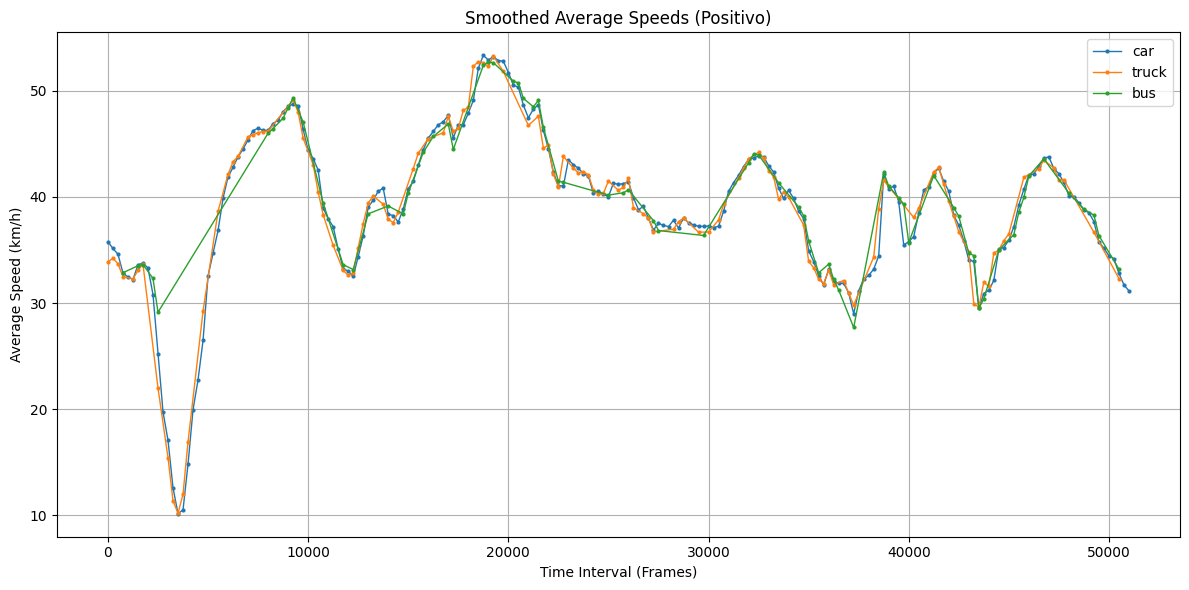

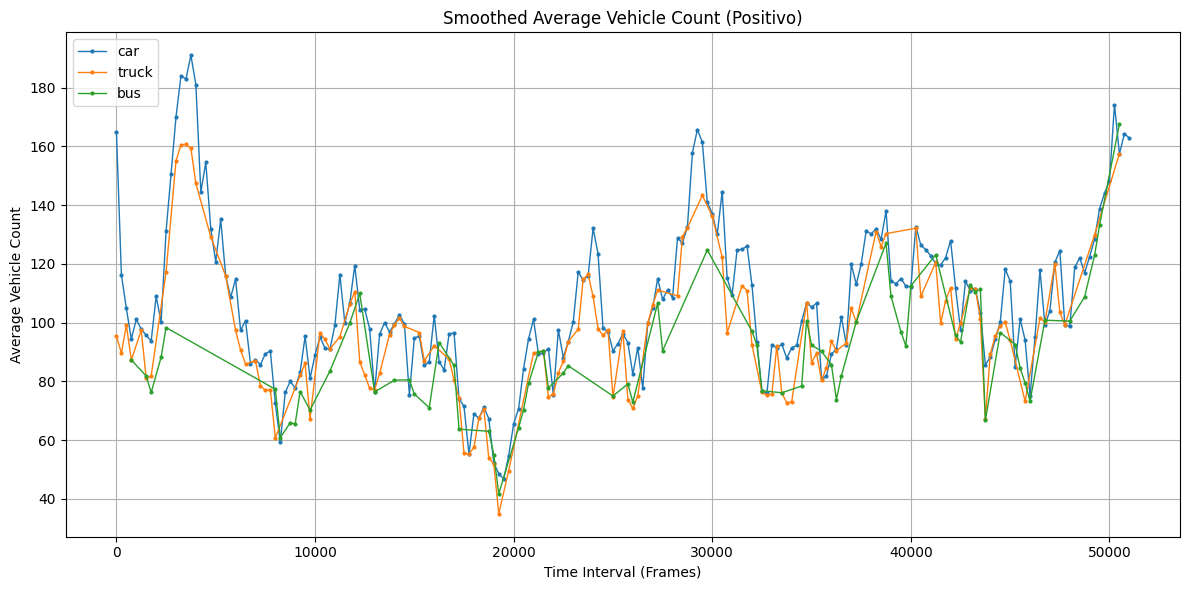

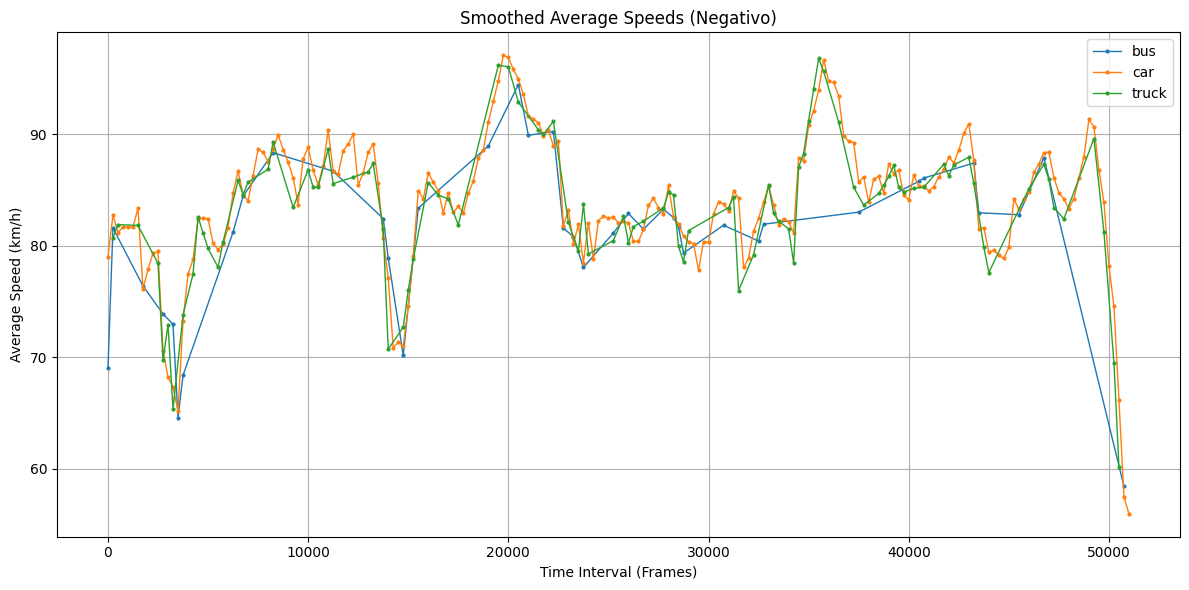

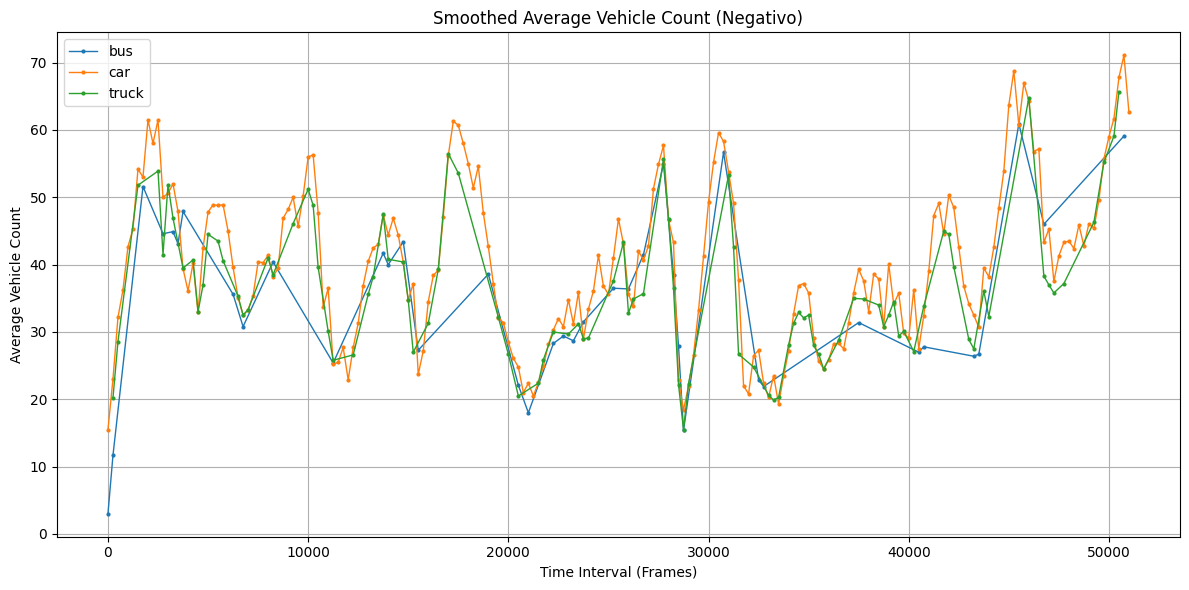

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
vehicle_data_df = pd.read_csv("vehicle_data.csv")

# Variable defining the time interval
time_interval = 25 * 10  # Time interval in frames
max_acceleration = 0.058  # Reasonable acceleration/deceleration limit in units per frame^2

# Determine the dominant class for each tracker_id
dominant_class = vehicle_data_df.groupby(['tracker_id', 'class']).size().reset_index(name='count')
dominant_class = dominant_class.loc[dominant_class.groupby('tracker_id')['count'].idxmax()]  # Get the class with the maximum count for each tracker_id
vehicle_data_df = vehicle_data_df.merge(dominant_class[['tracker_id', 'class']], on='tracker_id', suffixes=('', '_dominant'))
vehicle_data_df['class'] = vehicle_data_df['class_dominant']  # Set the dominant class as the final class
vehicle_data_df.drop(columns=['class_dominant'], inplace=True)  # Drop the temporary dominant class column

# Filter speeds based on acceleration
def filter_speeds(data, max_acc):
    filtered_data = []
    for tracker_id, group in data.groupby('tracker_id'):
        group = group.sort_values('frame')  # Sort by frame (time)
        group['speed_diff'] = group['speed'].diff()  # Difference in speed
        group['frame_diff'] = group['frame'].diff()  # Difference in frames
        group['acceleration'] = group['speed_diff'] / group['frame_diff']  # Estimated acceleration
        
        # Correct to ensure acceleration and speed are positive
        group['speed'] = group['speed'].abs()  # Ensure speed is positive
        group = group[(group['acceleration'].abs() <= max_acc) | (group['acceleration'].isna())]  # Filter out data with excessive acceleration
        filtered_data.append(group.drop(columns=['speed_diff', 'frame_diff', 'acceleration']))  # Drop temporary columns
    return pd.concat(filtered_data)

vehicle_data_df = filter_speeds(vehicle_data_df, max_acceleration)

# Add a time interval column
vehicle_data_df['time_interval'] = (vehicle_data_df['frame'] // time_interval) * time_interval

# Function to smooth data with a moving average
def smooth_data(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()  # Apply rolling mean with the specified window size

# Function to plot the graphs with smoothing
def plot_graphs(data, direction, smoothing_window=5):
    # Filter the data for the specific direction
    data = data[data['direction'] == direction]

    # Graph 1: Smoothed average speeds    
    speed_means = data.groupby(['time_interval', 'class'])['speed'].apply(lambda x: abs(x).mean()).reset_index()

    # Smooth the average speed data
    speed_means['smoothed_speed'] = smooth_data(speed_means['speed'], smoothing_window)

    # Plot the average speeds
    plt.figure(figsize=(12, 6))
    for vehicle_type in speed_means['class'].unique():
        subset = speed_means[speed_means['class'] == vehicle_type]
        if not subset.empty:
            plt.plot(subset['time_interval'], subset['smoothed_speed'], 
                     marker='o', markersize=2, linewidth=1, label=f'{vehicle_type}')  # Adjusting points and lines

    plt.title(f"Smoothed Average Speeds ({direction.capitalize()})")
    plt.xlabel("Time Interval (Frames)")
    plt.ylabel("Average Speed (km/h)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Graph 2: Smoothed average vehicle counts
    count_means = data.groupby(['time_interval', 'class']).size().reset_index(name='count')

    # Smooth the average count data
    count_means['smoothed_count'] = smooth_data(count_means['count'], smoothing_window)

    # Plot the average vehicle counts
    plt.figure(figsize=(12, 6))
    for vehicle_type in count_means['class'].unique():
        subset = count_means[count_means['class'] == vehicle_type]
        if not subset.empty:
            plt.plot(subset['time_interval'], subset['smoothed_count'], 
                     marker='o', markersize=2, linewidth=1, label=f'{vehicle_type}')  # Adjusting points and lines

    plt.title(f"Smoothed Average Vehicle Count ({direction.capitalize()})")
    plt.xlabel("Time Interval (Frames)")
    plt.ylabel("Average Vehicle Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot graphs for the positive direction with smoothing (adjust the smoothing window here)
plot_graphs(vehicle_data_df, 'positivo', smoothing_window=10)

# Plot graphs for the negative direction with smoothing (adjust the smoothing window here)
plot_graphs(vehicle_data_df, 'negativo', smoothing_window=10)
